In [4]:
!python3 -m pip install -q umap-learn

You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.


In [2]:
#!python3 -m pip install -q matplotlib datashader bokeh holoviews scikit-image colorcet

You should consider upgrading via the '/Users/davidbustosusta/Desktop/BIT/Bootcamp-DS-2024-I/env_3.9/bin/python -m pip install --upgrade pip' command.


In [1]:
# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')
# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd
import statsmodels.api as sm

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
import matplotlib.font_manager
from matplotlib import style
style.use('ggplot') or plt.style.use('ggplot')

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PowerTransformer
# Preprocesado y modelado
import umap

In [2]:
USArrests: pd.DataFrame = sm.datasets.get_rdataset("USArrests", "datasets")
datos: pd.DataFrame = USArrests.data
datos.head(10)

,Murder,Assault,UrbanPop,Rape
rownames,,,,
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6
Colorado,7.9,204,78,38.7
Connecticut,3.3,110,77,11.1
Delaware,5.9,238,72,15.8
Florida,15.4,335,80,31.9


In [3]:
R:pd.DataFrame=datos.reset_index()
R

,rownames,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [1]:
!python3 -m pip install -q 'pandas-profiling[notebook,html]'


[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


In [4]:
X: np.ndarray = datos.values
scaler: StandardScaler = StandardScaler()
X_new: np.ndarray = scaler.fit_transform(X)
print(X_new.shape)

(50, 4)


In [5]:
X_new

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

```
 * euclidean (or l2)
* manhattan (or l1)
* cityblock
* braycurtis
* canberra
* chebyshev
* correlation
* cosine
* dice
* hamming
* jaccard
* kulsinski
* ll_dirichlet
* mahalanobis
* matching
* minkowski
* rogerstanimoto
* russellrao
* seuclidean
* sokalmichener
* sokalsneath
* sqeuclidean
* yule
* wminkowski
```

In [6]:
# Aplicar UMAP
#reducer = umap.UMAP() # Default
reducer = umap.UMAP(n_neighbors=15, n_components=2, metric='minkowski')

In [7]:
embedding = reducer.fit_transform(X_new)
embedding

array([[ 9.288045 ,  6.4728913],
       [ 8.207898 ,  6.8119755],
       [ 8.197014 ,  7.6742725],
       [11.460988 ,  7.8835115],
       [ 7.73096  ,  7.6084843],
       [ 7.800266 ,  7.884837 ],
       [11.363214 , 10.088687 ],
       [10.786519 ,  8.6359625],
       [ 8.369783 ,  7.3381176],
       [ 9.353927 ,  6.9244456],
       [10.774752 ,  9.619685 ],
       [12.757855 ,  9.497112 ],
       [ 8.717176 ,  8.069554 ],
       [11.276626 ,  8.644137 ],
       [12.619843 , 10.122325 ],
       [11.608323 ,  9.061095 ],
       [12.129863 ,  8.467762 ],
       [ 9.029301 ,  6.7088737],
       [13.034141 ,  9.978103 ],
       [ 8.7395315,  7.135546 ],
       [10.533029 , 10.000058 ],
       [ 7.871166 ,  7.0837154],
       [12.113109 , 10.140932 ],
       [ 9.748402 ,  6.4652023],
       [ 9.877655 ,  8.243298 ],
       [12.4452715,  9.057351 ],
       [12.171905 ,  9.501065 ],
       [ 7.645395 ,  7.2866755],
       [12.8788395, 10.419289 ],
       [10.030978 ,  9.593048 ],
       [ 8

In [8]:
tabla_final=pd.DataFrame(embedding,columns=['PC1','PC2'])
tabla_final['State']=datos.index
tabla_final.head()

,PC1,PC2,State
0,9.288045,6.472891,Alabama
1,8.207898,6.811975,Alaska
2,8.197014,7.674273,Arizona
3,11.460988,7.883512,Arkansas
4,7.730960,7.608484,California


Text(0, 0.5, 'PC2')

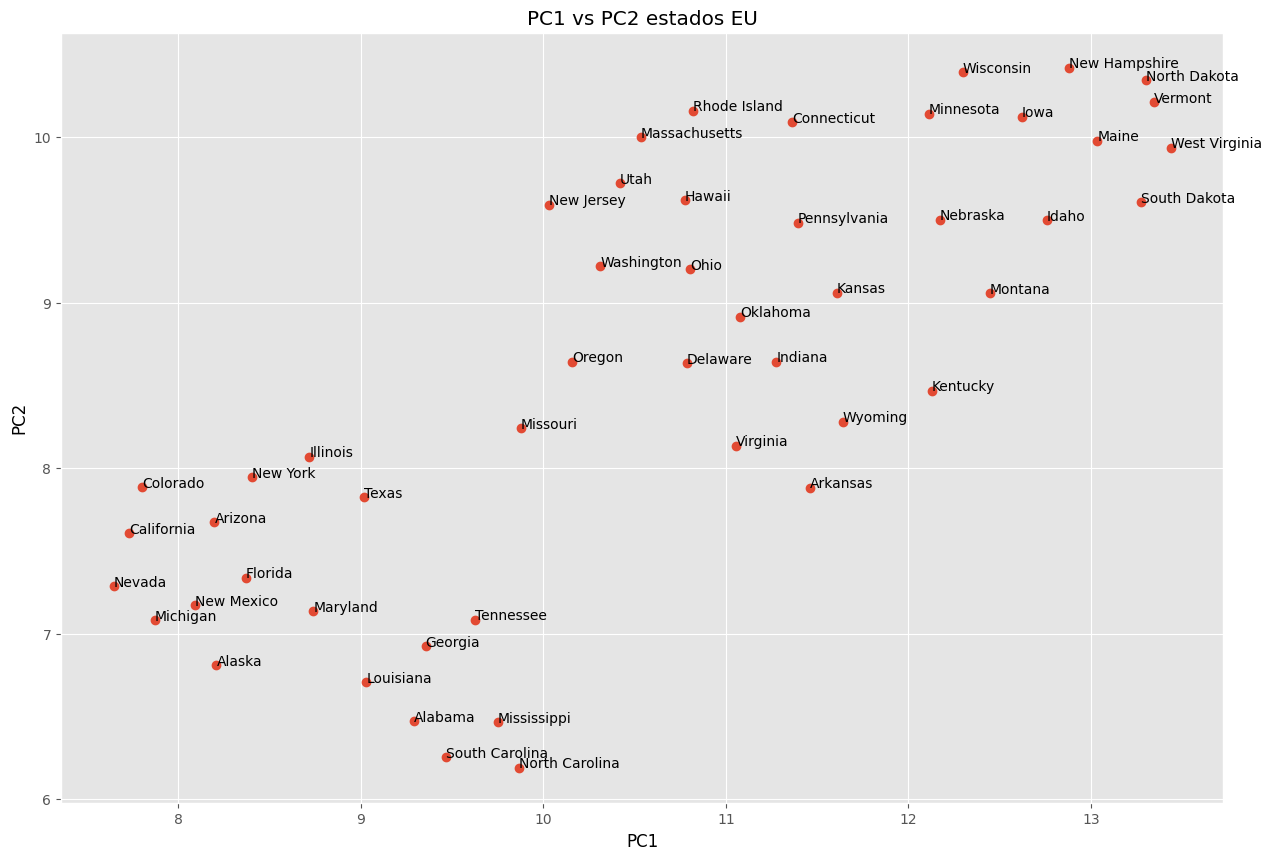

In [9]:
from matplotlib import pyplot as plt
plt.figure(figsize=(15,10))

ax = tabla_final.set_index('PC1')['PC2'].plot(style='o')
def label_point(x, y, val, ax):
  a = pd.concat({'x': x, 'y': y, 'State': val}, axis=1)
  for i, point in a.iterrows():
    ax.text(point['x'], point['y'], str(point['State']))

label_point(tabla_final.PC1, tabla_final.PC2, tabla_final.State, ax)
#plt.axvline(x=0,color='black')
#plt.axhline(y=0,color='black')
plt.title('PC1 vs PC2 estados EU')
plt.xlabel('PC1',color='k')
plt.ylabel('PC2',color='black')

# Desafio

El conjunto de datos original trata de predecir la categoría de un producto de comercio electrónico dado varios atributos sobre el anuncio. Aunque las características están anonimizadas, tienen propiedades relacionadas con características del mundo real

La idea sería poder replicar la metodología UMAP con el fin de visualizar mejor las estructuras de relaciones entre los datos

## Model

In [10]:
david_df = pd.read_csv("./train.csv")
X, y = david_df.drop("target", axis=1), david_df[["target"]].values.flatten()
print(X.shape)
X.head().sample(30, axis=1)

(200000, 76)


,feature_73,feature_13,feature_44,feature_1,feature_12,feature_17,feature_39,feature_71,feature_18,feature_65,...,feature_74,feature_45,feature_50,feature_22,feature_8,feature_23,feature_29,feature_48,feature_3,feature_16
0,0,0,0,0,3,3,0,0,3,3,...,0,0,3,0,7,0,0,0,1,0
1,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,5,0,0,8,...,0,1,7,0,0,0,1,1,0,0
3,3,0,1,0,5,0,7,0,22,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,5,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
np.unique(y)

array(['Class_1', 'Class_2', 'Class_3', 'Class_4', 'Class_5', 'Class_6',
       'Class_7', 'Class_8', 'Class_9'], dtype=object)

In [12]:
y

array(['Class_6', 'Class_6', 'Class_2', ..., 'Class_8', 'Class_7',
       'Class_8'], dtype=object)

In [13]:
pipe = make_pipeline(PowerTransformer())
X = pipe.fit_transform(X.copy())
y_t = pd.factorize(y)[0]

In [14]:
y_t

array([0, 0, 1, ..., 2, 6, 2])

In [15]:
umap.UMAP().fit?

Object `fit` not found.


In [16]:
umap_david = umap.UMAP().fit(X, y_t)

## Plots

In [20]:
!pip3 install -q umap-learn

You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.


In [21]:
!pip3 install -q ydata-profiling

You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.


In [23]:
from ydata_profiling import ProfileReport

In [24]:
profile=ProfileReport(R, title="Profiling Report")

In [27]:
profile.to_notebook_iframe()

In [28]:
profile.to_file("report.html")

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

<Axes: >

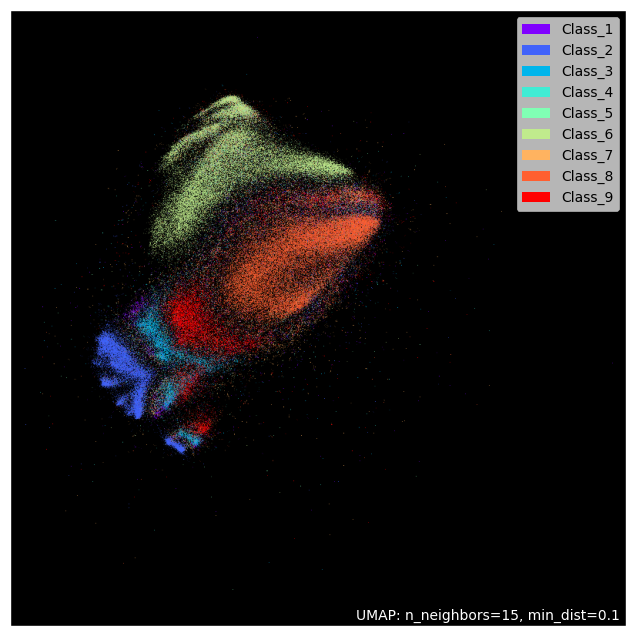

In [22]:
import umap.plot  # pip install umap-learn[plot]
umap.plot.points(umap_david, labels=y, theme="fire")

Temas disponibles

- fire
- viridis
- inferno
- blue
- red
- green
- darkblue
- darkred
- darkgreen

<Axes: >

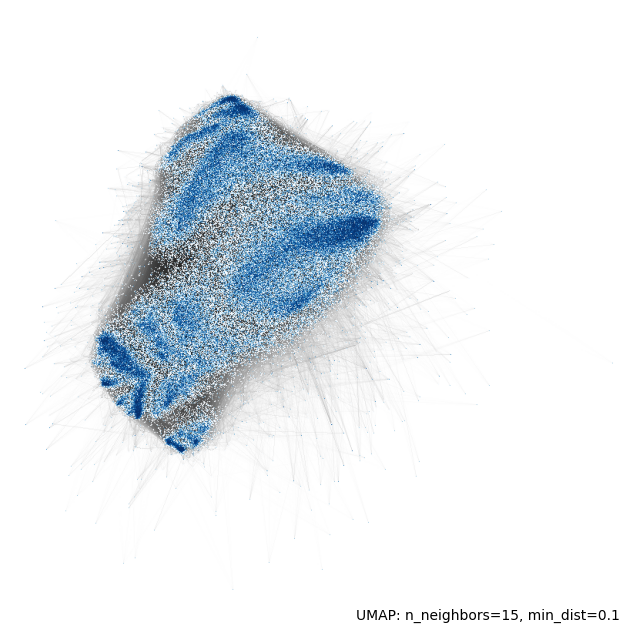

In [23]:
umap.plot.connectivity(umap_david, show_points=True)

In [ ]:
umap.plot.connectivity(umap_david, edge_bundling='hammer')